# Lesson Introduction: GP From Fundamentals
Building a GP one piece at a time

## Current holdups/questions
* `f_star = gp.conditional("f_star", np.array([.2])[:, None])` is causing an exception I'm not sure why
* In the second example below without pymc, if the data is generated from the kernel how is it observed?
  * Other than that its really neat to see the GP manually built from a mean function and covariance

In [22]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc.sampling_jax
import scipy.stats as stats

plt.style.use('intuitivebayes.mplstyle')
figsize = (14,7)  

In [23]:
# Start with simulated sine wave 
np.random.seed(1)
x_axis = np.linspace(-4,4, 20)


sigma = .1
# Copy the x_vals a couple of times to get multiple points per x_val
x_vals = np.tile(x_axis, 3)
noise = stats.norm(0, sigma).rvs(x_vals.shape)

# Repeat the data a couple of times
y_obs = np.sin(x_vals) + noise

# Fitting and predicting a point

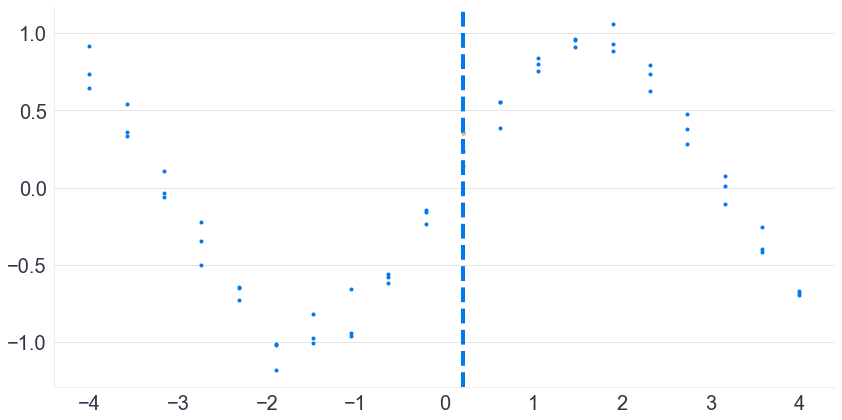

In [26]:
figsize = (14,7)  
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(x_vals, y_obs)

index = 10
ax.axvline(x_axis[index], linestyle='--')
ax.scatter(x_axis[index], y_obs[index]);

In this lesson we're going to make a prediction at a specific x value of interest, x prime as its typically called, just like we did in the last lesson

But now were going to do two things differently

## Our GP

In [35]:
X = x_vals[:,None]
x_prediction = .2

with pm.Model() as latent_gp_model:
    # Specify the covariance function.
    cov_func = pm.gp.cov.ExpQuad(1, ls=0.1)

    # Specify the GP.  The default mean function is `Zero`.
    gp = pm.gp.Latent(cov_func=cov_func)
    
    # Place a GP prior over the function f.
    f = gp.prior("f", X=X)
    
    # TODO: This line is causing an aesara exception
    f_star = gp.conditional("f_star", np.array([.2])[:, None])

    obs = pm.Normal("lik", mu=f, sigma=sigma, observed=y_obs)
    
    # TODO: Can we change these var names to be more intuitive

    trace = pm.sample(1000, chains=2, return_inferencedata=True)
    
    pred_samples = pm.sample_posterior_predictive(trace.posterior, var_names=["f_star"])

ERROR (aesara.graph.opt): Optimization failure due to: constant_folding
ERROR (aesara.graph.opt): node: Cholesky{lower=True, destructive=False, on_error='raise'}(TensorConstant{[[1.000000..0000e+00]]})
ERROR (aesara.graph.opt): TRACEBACK:
ERROR (aesara.graph.opt): Traceback (most recent call last):
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/graph/opt.py", line 1861, in process_node
    replacements = lopt.transform(fgraph, node)
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/graph/opt.py", line 1066, in transform
    return self.fn(fgraph, node)
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/tensor/basic_opt.py", line 2868, in constant_folding
    required = thunk()
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/graph/op.py", line 524, in rval
    r = p(n, [x[0] for x in i], o)
  File "/home/canyon/minico

ERROR (aesara.graph.opt): Optimization failure due to: constant_folding
ERROR (aesara.graph.opt): node: Cholesky{lower=True, destructive=False, on_error='raise'}(TensorConstant{[[1.000000..0000e+00]]})
ERROR (aesara.graph.opt): TRACEBACK:
ERROR (aesara.graph.opt): Traceback (most recent call last):
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/graph/opt.py", line 1861, in process_node
    replacements = lopt.transform(fgraph, node)
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/graph/opt.py", line 1066, in transform
    return self.fn(fgraph, node)
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/tensor/basic_opt.py", line 2868, in constant_folding
    required = thunk()
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/graph/op.py", line 524, in rval
    r = p(n, [x[0] for x in i], o)
  File "/home/canyon/minico

ERROR (aesara.graph.opt): Optimization failure due to: constant_folding
ERROR (aesara.graph.opt): node: Cholesky{lower=True, destructive=False, on_error='raise'}(TensorConstant{[[1.000000..0000e+00]]})
ERROR (aesara.graph.opt): TRACEBACK:
ERROR (aesara.graph.opt): Traceback (most recent call last):
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/graph/opt.py", line 1861, in process_node
    replacements = lopt.transform(fgraph, node)
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/graph/opt.py", line 1066, in transform
    return self.fn(fgraph, node)
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/tensor/basic_opt.py", line 2868, in constant_folding
    required = thunk()
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/aesara/graph/op.py", line 524, in rval
    r = p(n, [x[0] for x in i], o)
  File "/home/canyon/minico

LinAlgError: 21-th leading minor of the array is not positive definite
Apply node that caused the error: Cholesky{lower=True, destructive=False, on_error='raise'}(TensorConstant{[[1.000000..0000e+00]]})
Toposort index: 1
Inputs types: [TensorType(float64, (60, 60))]
Inputs shapes: [(60, 60)]
Inputs strides: [(480, 8)]
Inputs values: ['not shown']
Outputs clients: [[SolveTriangular{lower=True, trans=0, unit_diagonal=False, check_finite=True}(Cholesky{lower=True, destructive=False, on_error='raise'}.0, TensorConstant{[[0.000000..531e-314]]}), SolveTriangular{lower=True, trans=0, unit_diagonal=False, check_finite=True}(Cholesky{lower=True, destructive=False, on_error='raise'}.0, f{(60,) of 0.0})]]

Backtrace when the node is created (use Aesara flag traceback__limit=N to make it longer):
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
    return runner(coro)
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_9285/1074937131.py", line 15, in <cell line: 4>
    f_star = gp.conditional("f_star", np.array([.2])[:, None])
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/pymc/gp/gp.py", line 233, in conditional
    mu, cov = self._build_conditional(Xnew, *givens, jitter)
  File "/home/canyon/miniconda3/envs/intuitive_bayes_gp/lib/python3.10/site-packages/pymc/gp/gp.py", line 191, in _build_conditional
    L = cholesky(stabilize(Kxx, jitter))

HINT: Use the Aesara flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

One, We're going to do it using a GP. And 2 were going to show you exactly how we're going to do it in great detail. Even more detail than you're seeing here

In [ ]:
pred_samples.posterior_predictive.values

In [ ]:
vals = pred_samples.posterior_predictive.f_star.values.squeeze()

Question for Bill: Posterior Predictive looks very wide. Am I accidentally sampling from the prior?

In [ ]:
figsize = (14,7)  
fig, ax = plt.subplots(figsize=figsize)

ax.scatter(x_vals, y)
ax.scatter(np.full(vals.shape, x_prediction), vals, alpha=.4);

## Test Section
Temporary questions for bill
* If Y is randomly generated how is it observed/

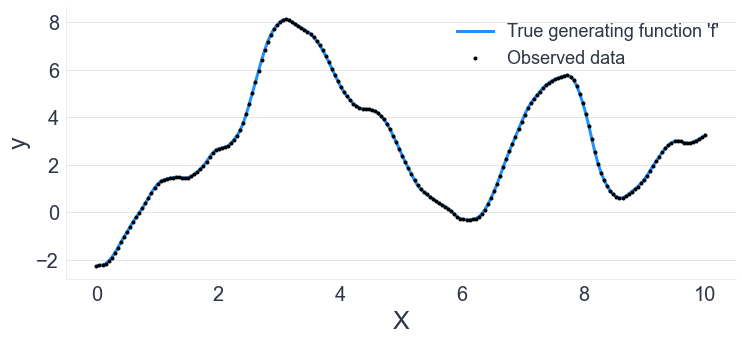

In [76]:
n = 200  # The number of data points
X = np.linspace(0, 10, n)[:, None]  # The inputs to the GP must be arranged as a column vector

# Define the true covariance function and its parameters
ℓ_true = 1.0
η_true = 3.0

## TODO IB: Construct this manually using numpy ad arrays
cov_func = η_true ** 2 * pm.gp.cov.Matern52(1, ℓ_true)

# A mean function that is zero everywhere
# TODO: Construct this manually using np.tile or something like that
mean_func = pm.gp.mean.Zero()

# The latent function values are one sample from a multivariate normal
# Note that we have to call `eval()` because PyMC3 built on top of Theano
f_true = np.random.multivariate_normal(
    mean_func(X).eval(), cov_func(X).eval() + 1e-8 * np.eye(n), 1
).flatten()

# The observed data is the latent function plus a small amount of T distributed noise
# The standard deviation of the noise is `sigma`, and the degrees of freedom is `nu`
σ_true = 2.0
ν_true = 3.0
y = f_true # + σ_true * np.random.standard_t(ν_true, size=n)

## Plot the data and the unobserved latent function
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()
ax.plot(X, f_true, "dodgerblue", lw=3, label="True generating function 'f'")
ax.plot(X, y, "ok", ms=3, label="Observed data")
ax.set_xlabel("X")
ax.set_ylabel("y")
plt.legend();

In [78]:
cov_func(X).eval()

array([[9.00000000e+00, 8.98111740e+00, 8.92509384e+00, ...,
        4.08629167e-07, 3.68675054e-07, 3.32612660e-07],
       [8.98111740e+00, 9.00000000e+00, 8.98111740e+00, ...,
        4.52892803e-07, 4.08629167e-07, 3.68675054e-07],
       [8.92509384e+00, 8.98111740e+00, 9.00000000e+00, ...,
        5.01928364e-07, 4.52892803e-07, 4.08629167e-07],
       ...,
       [4.08629167e-07, 4.52892803e-07, 5.01928364e-07, ...,
        9.00000000e+00, 8.98111740e+00, 8.92509384e+00],
       [3.68675054e-07, 4.08629167e-07, 4.52892803e-07, ...,
        8.98111740e+00, 9.00000000e+00, 8.98111740e+00],
       [3.32612660e-07, 3.68675054e-07, 4.08629167e-07, ...,
        8.92509384e+00, 8.98111740e+00, 9.00000000e+00]])

## Section 10: Multivariate normals
* The distribution that underlies it all
* How covariance

## Section 20: ?

## Section 30: ?

## Section 40: 

# Section 10: Multivariate normals




## Section Recap
* Normal or Gaussian Distributions 
* Covariance is the relationship between the value on one dimension with another

# Section 20: 

## Section Recap

# Section 30: